<div align="center"><img src="https://i1.wp.com/speedbirdspotter.com/wp-content/uploads/2017/04/17917451_10209370256432909_1730598885171112811_o.jpg?fit=1108%2C737&ssl=1" width="400" align="center"></div>

<p style="font-size: 2em; text-align: center;">Assignment 6: Natural Language Processing with NLTK and scikit-learn</p>
<p style="font-size: 1.5em; text-align: center;">Analyzing Sentiment of Airline Passenger Tweets</p>
<p style="text-align: center;">Henry Loughlin</p>
<p style="text-align: center;">EAI6000</p>
<p style="text-align: center;">Professor Mark Wagy</p>
<p style="text-align: center;">May 19, 2022</p>

In [1]:
import nltk
import json
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import brown, webtext, stopwords
from string import punctuation
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from datetime import datetime as dt

In [2]:
# Having done all our imports, we need to download the corpora we'll be working with.
# There are seven in total, and each will be necessary for training our models.
nltk.download("brown", quiet=True)
nltk.download("webtext", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("averaged_perceptron_tagger", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download("punkt", quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [3]:
# Get the number of words in the Brown corpus.
print(f"The length of the Brown corpus is {len(brown.words())}.")

print()

# Here are some words.
print(f"Words: {brown.words()}")

print()

# Here's a sample.
print(f"Sentences: {brown.sents()}")

The length of the Brown corpus is 1161192.

Words: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

Sentences: [['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


In [4]:
# Examine fileids='ca01'
brown.sents(fileids='ca01')

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [5]:
# How many sources?
len(brown.fileids())

500

In [6]:
# Top 100 sources.
print(brown.fileids()[:100])

['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15', 'ca16', 'ca17', 'ca18', 'ca19', 'ca20', 'ca21', 'ca22', 'ca23', 'ca24', 'ca25', 'ca26', 'ca27', 'ca28', 'ca29', 'ca30', 'ca31', 'ca32', 'ca33', 'ca34', 'ca35', 'ca36', 'ca37', 'ca38', 'ca39', 'ca40', 'ca41', 'ca42', 'ca43', 'ca44', 'cb01', 'cb02', 'cb03', 'cb04', 'cb05', 'cb06', 'cb07', 'cb08', 'cb09', 'cb10', 'cb11', 'cb12', 'cb13', 'cb14', 'cb15', 'cb16', 'cb17', 'cb18', 'cb19', 'cb20', 'cb21', 'cb22', 'cb23', 'cb24', 'cb25', 'cb26', 'cb27', 'cc01', 'cc02', 'cc03', 'cc04', 'cc05', 'cc06', 'cc07', 'cc08', 'cc09', 'cc10', 'cc11', 'cc12', 'cc13', 'cc14', 'cc15', 'cc16', 'cc17', 'cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12']


In [7]:
# First 1,000 characters.
print(brown.raw('cb01').strip()[:1000])

Assembly/nn-hl session/nn-hl brought/vbd-hl much/ap-hl good/nn-hl 
The/at General/jj-tl Assembly/nn-tl ,/, which/wdt adjourns/vbz today/nr ,/, has/hvz performed/vbn in/in an/at atmosphere/nn of/in crisis/nn and/cc struggle/nn from/in the/at day/nn it/pps convened/vbd ./.
It/pps was/bedz faced/vbn immediately/rb with/in a/at showdown/nn on/in the/at schools/nns ,/, an/at issue/nn which/wdt was/bedz met/vbn squarely/rb in/in conjunction/nn with/in the/at governor/nn with/in a/at decision/nn not/* to/to risk/vb abandoning/vbg public/nn education/nn ./.


	There/ex followed/vbd the/at historic/jj appropriations/nns and/cc budget/nn fight/nn ,/, in/in which/wdt the/at General/jj-tl Assembly/nn-tl decided/vbd to/to tackle/vb executive/nn powers/nns ./.
The/at final/jj decision/nn went/vbd to/in the/at executive/nn but/cc a/at way/nn has/hvz been/ben opened/vbn for/in strengthening/vbg budgeting/vbg procedures/nns and/cc to/to provide/vb legislators/nns information/nn they/ppss need/vb ./.




In [8]:
# Now we will check out webtext, another corpus.
# Here we examine the names of the documents in it.
webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [9]:
# For fun, we'll look at some singles ads in webtext.
# We will perform some NLP tasks with them, including tokenizing and
# removing stopwords, which are common words (a, an, etc.) and do not
# give the model useful information.

# For each instance (#:) and line of the singles ads.
for i, line in enumerate(webtext.raw('singles.txt').split('\n')):
    
    # Stop when we get to #10 (net #11)
    if i > 10:
        break
        
    # Otherwise, print the number, tab space in between, then the line.
    # A bunch of fun ones in there.
    print(str(i) + ':\t' + line)

0:	25 SEXY MALE, seeks attrac older single lady, for discreet encounters.
1:	35YO Security Guard, seeking lady in uniform for fun times.
2:	40 yo SINGLE DAD, sincere friendly DTE seeks r/ship with fem age open S/E
3:	44yo tall seeks working single mum or lady below 45 fship rship. Nat Open
4:	6.2 35 yr old OUTGOING M seeks fem 28-35 for o/door sports - w/e away
5:	A professional business male, late 40s, 6 feet tall, slim build, well groomed, great personality, home owner, interests include the arts travel and all things good, Ringwood area, is seeking a genuine female of similar age or older, in same area or surrounds, for a meaningful long term rship. Looking forward to hearing from you all.
6:	ABLE young man seeks, sexy older women. Phone for fun ready to play
7:	AFFECTIONATE LADY Sought by generous guy, 40s, mutual fulfillment
8:	ARE YOU ALONE or lost in a r/ship too, with no hope in sight? Maybe we could explore new beginnings together? Im 45 Slim/Med build, GSOH, high needs and lo

In [66]:
# For fun, we will examine a candidate in further depth.
# Let's generate a random integer to choose.
num = random.randint(0,10)
print(num)

4


In [67]:
# Here's our ad. Seems normal enough.
person = webtext.raw('singles.txt').split('\n')[num]
print(person)

6.2 35 yr old OUTGOING M seeks fem 28-35 for o/door sports - w/e away


In [68]:
# Let's tokenize this person's ad by sentences.
sent_tokenize(person)

['6.2 35 yr old OUTGOING M seeks fem 28-35 for o/door sports - w/e away']

In [69]:
# A quick for loop.
for sent in sent_tokenize(person):
    
    # Lowercasing makes our text more useful - we're comparing
    # apples to apples. The first of many generators is,
    # ironically, in a list comprehension.
    print([word.lower() for word in word_tokenize(sent)])


['6.2', '35', 'yr', 'old', 'outgoing', 'm', 'seeks', 'fem', '28-35', 'for', 'o/door', 'sports', '-', 'w/e', 'away']


In [70]:
# Then we'll tokenize the words.
print(word_tokenize(person))

['6.2', '35', 'yr', 'old', 'OUTGOING', 'M', 'seeks', 'fem', '28-35', 'for', 'o/door', 'sports', '-', 'w/e', 'away']


In [83]:
# We'll pull up a second ad.
# No repeats, so we set the upper cap of the
# random number generator to be less than our 
# previous number.
# Just to be extra safe, we'll take one off of that, too.
second_num = random.randint(0,(10-num))

In [84]:
# Here it is.
print(second_num)

0


In [85]:
# Second ad. Oh boy.
person_two = webtext.raw('singles.txt').split('\n')[second_num]
print(person_two)

25 SEXY MALE, seeks attrac older single lady, for discreet encounters.


In [86]:
# Second ad tokenized.
sent_tokenize(person_two)

['25 SEXY MALE, seeks attrac older single lady, for discreet encounters.']

In [87]:
# Now we need to get rid of stopwords.
# It's faster to generate a set vs. list so we'll do that here.
english_stopwords = set(stopwords.words('english'))
print(english_stopwords)

{'its', 'too', "didn't", 'if', 'same', 'were', 'm', 'shan', 'other', 'few', 'between', 'itself', "wasn't", 'any', 'yours', "needn't", 'not', "shouldn't", 'to', 'by', 'won', "hasn't", 'until', 'am', 'for', 'did', 'above', 'haven', 'them', 'our', 'being', 'it', 'all', 'aren', 'shouldn', "you'll", 'or', 'having', 'and', 'out', 're', "hadn't", 'which', 'there', 'isn', 'an', 'we', 'couldn', 'through', 'such', 'how', 'just', 'don', 'they', "should've", 'before', 'most', 'had', 'in', 'over', 've', 'are', 'down', 'then', 'own', 'during', 'himself', 'those', 'against', 'from', 'where', 'ain', "won't", 'myself', "mustn't", "aren't", 'your', "wouldn't", "shan't", 'after', 'd', 'so', 'theirs', 'while', 'needn', 'under', 'this', "haven't", 'nor', "you've", 'wasn', 'now', 'their', 'of', 'when', 'here', 'ours', 'who', 'didn', 'weren', "you're", 'has', "weren't", 'themselves', 't', 'these', 'him', 'herself', 'have', 'about', 'both', 's', 'whom', 'only', 'me', "isn't", 'more', 'a', 'doing', 'what', 'wi

In [97]:
# Now we will tokenize and lowercase the whole first ad.
ptl = list(map(str.lower, word_tokenize(person)))
print(person_tokenized_lowercase)

['6.2', '35', 'yr', 'old', 'outgoing', 'm', 'seeks', 'fem', '28-35', 'for', 'o/door', 'sports', '-', 'w/e', 'away']


In [98]:
# Sans stopwords!
print([word for word in ptl if word not in english_stopwords])

['6.2', '35', 'yr', 'old', 'outgoing', 'seeks', 'fem', '28-35', 'o/door', 'sports', '-', 'w/e', 'away']


In [99]:
# Punctuation doesn't help our models, either, so it makes sense to
# create a new set by joining the stopwords set with a new set of punctuation.
english_stopwords_punctuation = english_stopwords.union(set(punctuation))
# Print the first 100 (list comprehension purely for indexing purposes
# since sets aren't subscriptable).
print(list(english_stopwords_punctuation)[0:100])

['its', '{', 'too', '!', "didn't", 'if', '/', 'same', 'were', 'm', 'shan', '_', 'other', ',', 'few', 'between', 'itself', "wasn't", 'any', 'yours', "needn't", 'not', "shouldn't", 'to', ']', 'by', '+', 'won', "hasn't", 'until', 'am', '%', 'for', 'did', '#', 'above', '}', 'haven', 'them', 'our', 'being', ';', 'it', 'all', 'aren', 'shouldn', "you'll", 'or', 'having', 'and', 'out', 're', '`', "hadn't", 'which', 'there', 'isn', '"', 'an', 'we', 'couldn', 'through', 'such', 'how', 'just', 'don', '*', ':', 'they', "should've", 'before', 'most', 'had', 'in', 'over', 've', 'are', 'down', 'then', 'own', 'during', '&', 'himself', 'those', 'against', 'from', 'where', 'ain', "won't", 'myself', '(', "mustn't", "aren't", 'your', "wouldn't", "shan't", '>', 'after', 'd', 'so']


In [101]:
# The ad, sans stopwords and punctuation.
print([word for word in ptl if word not in english_stopwords_punctuation])

['6.2', '35', 'yr', 'old', 'outgoing', 'seeks', 'fem', '28-35', 'o/door', 'sports', 'w/e', 'away']


In [102]:
# Here we will get more stopwords to get rid of all the "dangling" verbs.
# The only way we can read this into a DataFrame is by index and then transpose it so we can pull "en." 
# Then drop nulls.
more_stopwords = pd.read_json(\
    "https://raw.githubusercontent.com/6/stopwords-json/" + \
    "master/stopwords-all.json",\
    orient="index").transpose()["en"].dropna()

In [103]:
# Here they are.
# Ironically since we are using an array, we have to convert it to
# a set so we can see the whole 100!
# Otherwise, we'd only see 0-4 and 95-99.
print(set(more_stopwords[0:100]))

{'aside', 'consequently', 'apart', 'certainly', 'between', 'any', 'besides', 'able', 'cant', 'by', 'becoming', 'around', 'beside', 'becomes', 'always', 'am', 'above', 'ask', 'being', 'all', 'alone', 'among', "can't", 'and', 'come', 'also', 'amongst', 'anyways', 'an', 'b', 'before', 'anyhow', 'accordingly', 'actually', 'appear', 'are', 'com', 'against', 'became', 'changes', 'behind', "aren't", 'after', 'almost', 'cause', 'certain', "a's", 'appropriate', 'become', 'c', 'associated', 'across', 'along', 'best', 'afterwards', "ain't", 'concerning', 'about', 'both', 'believe', 'allows', 'a', 'anybody', 'came', 'comes', 'because', 'brief', "c's", 'according', 'clearly', 'allow', 'although', 'anywhere', "c'mon", 'at', 'again', 'been', 'away', 'but', 'considering', 'already', 'available', 'can', 'co', 'another', 'causes', 'as', 'anyway', 'anything', 'awfully', 'consider', 'better', 'be', 'asking', 'below', 'appreciate', 'beyond', 'beforehand', 'anyone', 'cannot'}


In [104]:
# Monster set! This will help us filter out a lot of noise.
combined_stoplist = set.union(english_stopwords_punctuation, more_stopwords)
print(f"Length of Combined Stoplist: {len(combined_stoplist)}")


Length of Combined Stoplist: 631


In [105]:
# The second ad with the combined stoplist.
print(f"With combined stopwords: \
    {[word for word in ptl if word not in combined_stoplist]}")

With combined stopwords:     ['6.2', '35', 'yr', 'outgoing', 'seeks', 'fem', '28-35', 'o/door', 'sports', 'w/e']


In [106]:
# This is where the fun begins!

# For the main part of the assignment, We'll be analyzing airline
# passenger tweets for sentiment.

# Our target variable is airline_sentiment:
#     positive
#     neutral
#     negative

# Given these are distinct categories, this is a multi-class
# classification problem.

tas = pd.read_csv("https://raw.githubusercontent.com/yxccxxx/Twitter-Airline"\
    +"-Sentiment-Analysis/master/Tweets.csv")

In [107]:
# Quick peek at the top of the data.
tas.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [118]:
# Let's see how many tweets there are, as well as the number of tweets in each bucket.
# We might anticipate that the % of negative tweets is highest, and this is the case.
print(f"Number of Tweets: {len(tas)}")
print()
print(f"% Sent: {tas['airline_sentiment'].value_counts(ascending=False, normalize=True)}")

Number of Tweets: 14640

% Sent: negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64


In [119]:
# Let's look at a random tweet.
rand_tweet_num = random.randint(0,len(tas))
print(f"Random Number: {rand_tweet_num}")

# New line.
print("\n")

# We are pulling the text from the "text" column.
tweet = tas.loc[rand_tweet_num,"text"]
print(f"Tweet #{rand_tweet_num}: {tweet}")

Random Number: 2903


Tweet #2903: @united I get that. But doing it by giving inaccurate/misleading info doesn't seem like a great way to do it. #hopethegearmakesitintact


In [120]:
# Without stopwords or punctuation.
tweet_tokenized_lowercase = list(map(str.lower, word_tokenize(tweet)))
print([word for word in tweet_tokenized_lowercase if word not\
       in english_stopwords])

['@', 'united', 'get', '.', 'giving', 'inaccurate/misleading', 'info', "n't", 'seem', 'like', 'great', 'way', '.', '#', 'hopethegearmakesitintact']


In [121]:
# Now let's stem the words so that like words are treated the same.
# For fun, and because I like Ireland, the object name is irish_porter.
# Also, sans stopwords.
irish_porter = PorterStemmer()
print([irish_porter.stem(word) for word in tweet_tokenized_lowercase\
       if word not in combined_stoplist])

['unit', 'give', 'inaccurate/mislead', 'info', "n't", 'great', 'hopethegearmakesitintact']


In [122]:
# Now we'll use the lemmatizer, which — by grouping the distinct forms of
# a given word — enables us to further analyze it.
# Since they compare words to their "dictionary" forms, it is more
# resource-intensive than a stemmer.
# No such fun object name for the lemmatizer.
wnl = WordNetLemmatizer()
print([wnl.lemmatize(word) for word in tweet_tokenized_lowercase if \
       word not in combined_stoplist])

['united', 'giving', 'inaccurate/misleading', 'info', "n't", 'great', 'hopethegearmakesitintact']


In [139]:
# Before lemmatization, we need to ensure we properly process
# words that are not nouns.
# If the lemmatizer doesn't know what the words "are", then
# it is not of much help.
# As such we need to convert the words from being assumed
# nouns to their respective forms of verb, adjective, or adverb.

def penn_to_morphy(penn_tag):
    
    morphy_tag = {'NN':'n', 'JJ':'a',
                 'VB':'v', 'RB':'r'}
    
    try:
        return morphy_tag[penn_tag[:2]]
    except:
        
        # If we don't find a map then we will assume it's a noun.
        return 'n'
    
# Then we can lemmatize without issue.

def lemm(text):
    
    return [wnl.lemmatize(word.lower(), pos=penn_to_morphy(tag))\
            for word, tag in pos_tag(word_tokenize(text))]

In [146]:
# Let's compare the original tweet and the lemmatized and sans stopwords version.
print(f"Original Tweet: {tweet}")
print("\n")

# We're going to use this again in a minute, so more efficient to give 
# the generator an object.
tg = [w for w in lemm(tweet) if w not in combined_stoplist and not w.isdigit()]

# We will also chain the .isdigit() method into the generator
# so that no digits are included.
print(f"Lemmatized and Without Stopwords: {tg}")


Original Tweet: @united I get that. But doing it by giving inaccurate/misleading info doesn't seem like a great way to do it. #hopethegearmakesitintact


Lemmatized and Without Stopwords: ['unite', 'give', 'inaccurate/misleading', 'info', "n't", 'great', 'hopethegearmakesitintact']


In [148]:
# Now that the text is all lowercase and without digits and stopwords, 
# we can define a preprocessing function, which takes text and returns
# all the lemmas.

def preprocessing_function(text):
    
    return [word for word in lemmatize_sentence(text) if word \
            not in combined_stoplist and not word.isdigit()]

In [150]:
# Time to vectorize these strings with the Counter class.
processed_tweet = preprocessing_function(str(tg))

In [151]:
# Let's look at the processed tweet and the word counts.
print(f"Processed Tweet: {processed_tweet}")
print("\n")
print(f"Word Counts for Tweet: {Counter(processed_tweet)}")

Processed Tweet: ["'unite", "'give", "'inaccurate/misleading", "'info", '``', "n't", "''", "'great", "'hopethegearmakesitintact"]


Word Counts for Tweet: Counter({"'unite": 1, "'give": 1, "'inaccurate/misleading": 1, "'info": 1, '``': 1, "n't": 1, "''": 1, "'great": 1, "'hopethegearmakesitintact": 1})


In [152]:
# Since we've generated our preprocessing function, we can now
# apply it to the text of the tweets.
# This is where lambda functions are incredibly helpful, since
# we can go line-by-line and preprocess, since our lemmatizer
# requires strings.
tas['text_edited'] = tas['text'].apply(lambda text: preprocessing_function(text))

In [153]:
count_vectorizer = CountVectorizer()

# Now we can generate our predictors! This is pretty exciting.
# Basically, we are combining the Counter step that we performed
# before with vectorization through scikit-learn's fit_transform method.
# We will generate counts for each word and vectorize them in an array,
# which will serve as our predictors when we fit the model.
X = count_vectorizer.fit_transform(tas['text_edited'].astype(str)).toarray()

# Pretty large
print(f"Shape of Array: {X.shape}")

# And targets.
y = tas['airline_sentiment']

# Now that we have vectorized our text, we can split between train and test.
# random_state=0 so our result is deterministic.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)

Shape of Array: (14640, 12386)


In [154]:
# Fitting the model, generating predictions, and getting the accuracy
# between our test labels (actual values) and predictions.
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predictions = mnb.predict(X_test)
print(f"Our model predicts the correct sentiment \
    {round(accuracy_score(y_test, predictions) * 100,3)}% of the time.")

Our model predicts the correct sentiment     72.917% of the time.


Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.86      0.84      1870
     neutral       0.55      0.50      0.53       614
    positive       0.56      0.50      0.53       444

    accuracy                           0.73      2928
   macro avg       0.64      0.62      0.63      2928
weighted avg       0.72      0.73      0.73      2928


Confusion Matrix:
[[1608  160  102]
 [ 235  308   71]
 [ 131   89  224]]


Confusion Matrix Plot:


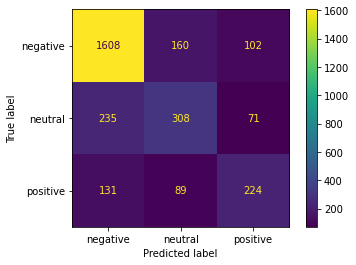

In [163]:
# For some additional information, we can generate a classification_report
# and confusion_matrix.

# The top part of the classification report shows how well we did predicting
# each label:
#
#     Precision: True Positives / False Positives. Our model is pretty
#     good at predicting negative tweets,
#     decently good at predicting positive tweets, and
#     so-so with neutral tweets.
#     Recall: True Positives / (True Positives + False Negatives).
#     Given a negative tweet, our model is VERY likely to find it,
#          but not as likely (~40% comparative likelihood) with
#          positive or neutral tweets.
#     F-1 Score: 2 * (Recall * Precision) / (Recall + Precision).
#     The "harmonic mean" of precision and recall, this provides
#          an objective, balanced metric for us to evaluate model
#          performance. Again, we perform well with negative, but not
#          nearly as well with positive or neutral.
#     Support: Number of samples in each class (in actuality).
#     Given everything that's been said above, it's important to point out
#          that it is completely unsurprising that negative had
#          the strongest performance metrics in each category by some distance
#          because it was the largest class (56% of the test labels!).
#          When you have a class imbalance that decisive, it can affect
#          model performance, so I would like to re-run the experiment
#          after addressing the imbalance.

print("Classification Report:")
print(classification_report(y_test, predictions))

# Skip a line.
print()

# The bottom part of the classification report provides some more
# intelligence regarding our model's performance:
#     Accuracy: Correct Observations / Total Observations. A performance
#     of 73% on our test set isn't bad,
#          but we can improve our model performance by balancing
#          the classes more.
#     Macro Average: (Negative + Neutral + Positive) / 3.
#     The sum of our F-1 scores,
#          divided by the number of classes (3).
#     Weighted Average: The F-1 score per class times the percentage
#     of the dataset that
#          the class comprises. Each product is then added together,
#          giving a total. This
#          goes some way to addressing the class imbalances, but we
#          still want to see if
#          the model will perform better on test data with an adapted
#          Naive Bayes classifier.

# The confusion matrix provides a simple breakdown of the number of
# predicted samples per class,
#     as well as the number of labels per actual class.
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# New line.
print("\n")

# Confusion Matrix Plot
print("Confusion Matrix Plot:")
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions)
plt.show()

In [169]:
# Due to the class imbalance (way more negatives than neutral or positives),
# we will use ComplementNB, a scikit-learn Naive Bayes classifier that is
# said to handle imbalanced classes better
# than MultinomialNB. We want the result to be deterministic so we're not
# changing the train_test_split's random_state,
# or the train/test balance of 0.8/0.2 — so no need to re-split.
cnb = ComplementNB()
cnb.fit(X_train, y_train)

# Generating our new_predictions
predictions = cnb.predict(X_test)

# A slight improvement, but nothing to 
print("Our new model predicts the correct sentiment " + \
    f"{round(accuracy_score(y_test, predictions) * 100,3)}% of the time.")

Our new model predicts the correct sentiment 73.087% of the time.


In [170]:
# A comparative look. The F-1 scores are identical, but we're slightly more
# precise with negatives and less precise with positives.
# We had intended to counteract that, but our macro averages are higher and
# the weighted averages pretty consistent.
# All that CPU power for 0.1%.
print("New Classification Report:")
print(classification_report(y_test, predictions))

New Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.86      0.84      1870
     neutral       0.55      0.50      0.53       614
    positive       0.56      0.50      0.53       444

    accuracy                           0.73      2928
   macro avg       0.64      0.62      0.63      2928
weighted avg       0.72      0.73      0.73      2928



New Confusion Matrix:
[[1608  160  102]
 [ 235  308   71]
 [ 131   89  224]]


New Confusion Matrix Plot:


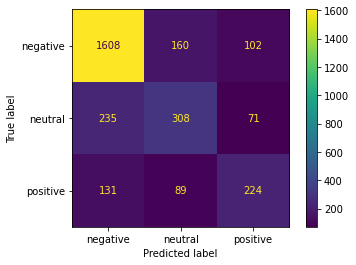

In [172]:
# Another confusion matrix and plot.
print("New Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# New line.
print("\n")

# Confusion Matrix Plot
print("New Confusion Matrix Plot:")
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions)
plt.show()